# Internet Blackout Sentiment Mapper
**Author:** Sujetha Janet  
**Date:** 2025  

This project analyzes public sentiment during internet blackouts using sample social media messages. It includes text cleaning, sentiment analysis, visualization, and mapping.


## Introduction
The goal of this project is to analyze public sentiment during internet blackouts. Sentiments are classified as Positive, Negative, or Neutral. Visualizations help understand trends and highlight the most common words people use during blackouts.


## Dataset Overview
The dataset contains the following columns:
- `date`: Date of the message
- `location`: City where the message was posted
- `latitude` & `longitude`: Geographical coordinates
- `text`: Original message content


In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv("internet_blackout_sample.csv")

# Display first 5 rows
df.head()

,date,location,latitude,longitude,text
0,2025-06-18,Jaipur,12.556805,75.628806,"Internet is down, can't work!"
1,2025-04-05,Pune,25.707215,77.526638,Social media is silent today
2,2025-02-15,Hyderabad,23.377344,75.768761,Blackout is affecting businesses
3,2025-03-14,New Delhi,27.796744,76.271688,"Internet is down, can't work!"
4,2025-04-24,Bangalore,18.401998,75.330914,Need internet for my meeting


## Data Cleaning
We removed URLs, special characters, and converted all text to lowercase for easier analysis.


In [4]:
import re

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove special characters
    text = text.lower()  # lowercase
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,date,location,latitude,longitude,text,clean_text
0,2025-06-18,Jaipur,12.556805,75.628806,"Internet is down, can't work!",internet is down cant work
1,2025-04-05,Pune,25.707215,77.526638,Social media is silent today,social media is silent today
2,2025-02-15,Hyderabad,23.377344,75.768761,Blackout is affecting businesses,blackout is affecting businesses
3,2025-03-14,New Delhi,27.796744,76.271688,"Internet is down, can't work!",internet is down cant work
4,2025-04-24,Bangalore,18.401998,75.330914,Need internet for my meeting,need internet for my meeting


## Sentiment Analysis
Each message is classified as:
- **Positive**: Indicates positive sentiment  
- **Negative**: Indicates frustration or negative sentiment  
- **Neutral**: Neither positive nor negative  


In [6]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['clean_text'].apply(get_sentiment)
df.head()


,date,location,latitude,longitude,text,clean_text,sentiment
0,2025-06-18,Jaipur,12.556805,75.628806,"Internet is down, can't work!",internet is down cant work,Negative
1,2025-04-05,Pune,25.707215,77.526638,Social media is silent today,social media is silent today,Positive
2,2025-02-15,Hyderabad,23.377344,75.768761,Blackout is affecting businesses,blackout is affecting businesses,Neutral
3,2025-03-14,New Delhi,27.796744,76.271688,"Internet is down, can't work!",internet is down cant work,Negative
4,2025-04-24,Bangalore,18.401998,75.330914,Need internet for my meeting,need internet for my meeting,Neutral


## Visualizations
We created the following visualizations:
1. **Bar chart** showing sentiment distribution  
2. **Word cloud** highlighting common words  
3. **Interactive map** showing message locations by sentiment


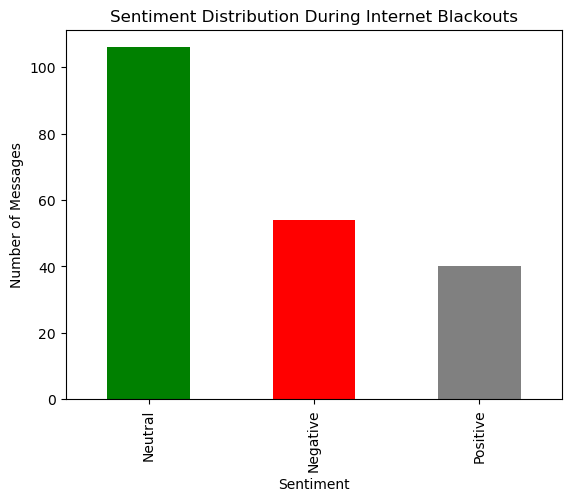

In [7]:
import matplotlib.pyplot as plt

sentiment_count = df['sentiment'].value_counts()

# Bar chart
sentiment_count.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution During Internet Blackouts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.show()


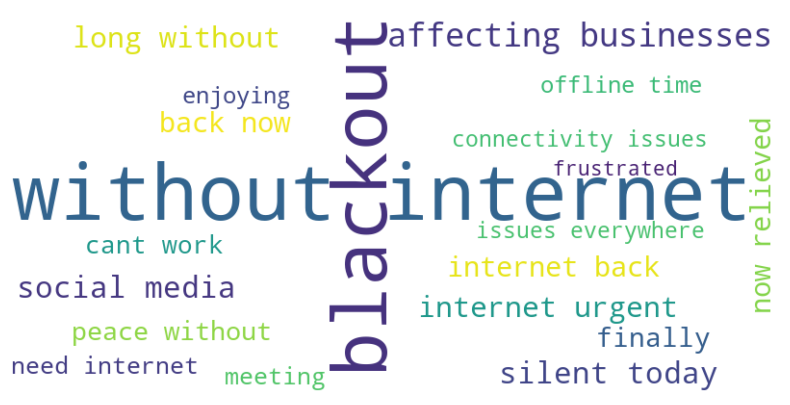

In [9]:
from wordcloud import WordCloud

text = " ".join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
import folium

# Map centered on India
map_blackout = folium.Map(location=[20, 77], zoom_start=5)

for idx, row in df.iterrows():
    color = 'green' if row['sentiment']=="Positive" else 'red' if row['sentiment']=="Negative" else 'gray'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True
    ).add_to(map_blackout)

map_blackout


In [12]:
df.to_csv("internet_blackout_sentiment.csv", index=False)


## Conclusion
The analysis shows the overall public sentiment during internet blackouts. Negative sentiments dominate when outages disrupt work or connectivity, while some users express calmness or enjoyment offline. This project demonstrates a basic sentiment analysis workflow and visual representation.
